# Purpose of the analysis

This study aims to evaluate the impact of various factors on an individual's risk of developing coronary heart disease (CHD) within the next decade. To achieve this goal, it is necessary to conduct statistical analysis on individual health data related to CHD. This dataset covers multiple aspects, including personal basic information, living habits, health status, and medical test indicators. Through in - depth analysis of this data, we can identify key factors closely associated with the risk of CHD onset.

The results of this study can be used to build a CHD risk prediction model. This model will assist medical institutions and healthcare providers in assessing the likelihood of an individual developing CHD in the future. Data analysis will help healthcare providers make more informed decisions when formulating preventive measures, diagnostic plans, and treatment strategies. For individuals, based on their personal risk assessment results, they can take targeted preventive actions, such as adjusting their lifestyle and enhancing health management, to reduce their risk of developing CHD.

# The short plan

* Import data
* Make a brief preliminary overview of the data
* If necessary, pre-process and clean each field.
* Check the final data set for duplicates and omissions, and evaluate its suitability for the study.
* Conduct a research analysis of the data and formulate conclusions
* Based on the findings from the data analysis, formulate a set of recommendations to the medical research

# A brief overview of the data

In [1]:
# Importing library modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.interpolate import interp1d

# Reading the source data from the CSV file into the Data Frame df
df_original = pd.read_csv('framingham.csv')

# We display the first ten lines for visual verification of the correctness of downloads.
display(df_original.head(10)) #tail()

# Displaying information about the Data frame
print(df_original.info())

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


# Data preprocessing

In [2]:
# Initial amount of data
data_len_start=df_original.shape[0]
print("Rows in the original set:",data_len_start)

Rows in the original set: 4238


We directly delete rows that contain two or more missing values.

In [3]:
# reading the original data
df_original = pd.read_csv('framingham.csv')

# calculating the number of missing values in each row and filtering out rows with 2 or more missing values (i.e., keeping rows with missing values ≤ 1)
df_filtered = df_original[df_original.isnull().sum(axis=1) < 2]

# printing the number of deleted rows
deleted_rows = len(df_original) - len(df_filtered)
print(f"Number of deleted rows: {deleted_rows} rows")
print(f"Remaining rows after processing: {len(df_filtered)} rows")
print(f"Deleted rows percentage: {deleted_rows / len(df_original) * 100:.2f}%")

# saving the processed table
df_filtered.to_csv('framingham_filtered.csv', index=False)
print("Processed table saved as: framingham_filtered.csv")

Number of deleted rows: 61 rows
Remaining rows after processing: 4177 rows
Deleted rows percentage: 1.44%
Processed table saved as: framingham_filtered.csv


In [4]:
df = pd.read_csv('framingham_filtered.csv')

## Gender

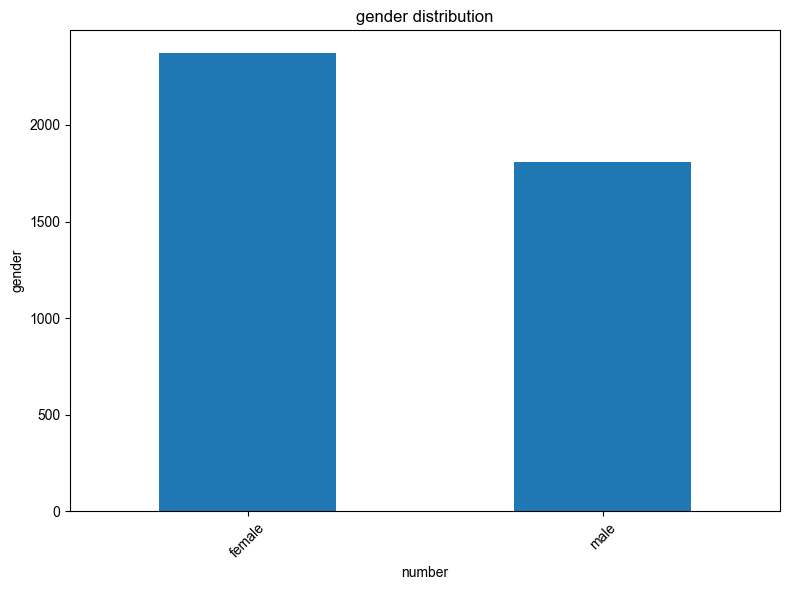

In [5]:
# set font
plt.rcParams["font.family"] = ["Arial", "SimHei"] 
# Replace 0 in the male column with female, and 1 with male
df['male'] = df['male'].map({0: 'female', 1:'male'})

# Plot the number distribution of the male column
value_counts_male = df['male'].value_counts()
plt.figure(figsize=(8, 6))
value_counts_male.plot(kind='bar')
plt.ylabel('gender')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('gender distribution')
plt.tight_layout()
plt.show()

# The distribution corresponds to the expected.
# No anomalies detected

## Age

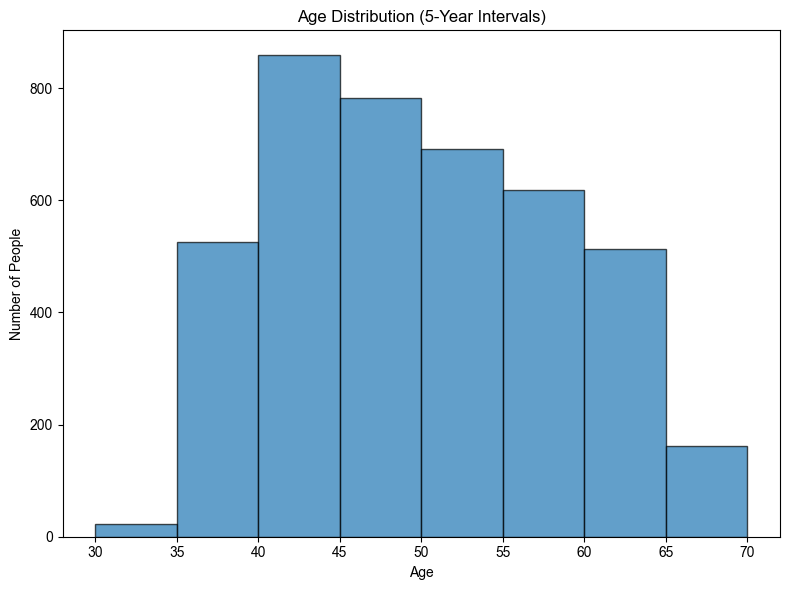

In [6]:
# Plot age distribution as histogram
plt.figure(figsize=(8, 6))

# Draw histogram with bins from 30 to 70 (5-year intervals)
plt.hist(df['age'], bins=range(30, 71, 5), edgecolor='black', alpha=0.7)

# Set axis labels and title (all in English)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution (5-Year Intervals)')

# Align x-axis ticks with bin intervals
plt.xticks(range(30, 71, 5))

# Adjust layout
plt.tight_layout()
plt.show()

# The distribution corresponds to the expected.
# No anomalies detected

## CigsPerDay

Proportion of missing values in the cigsPerDay column to the total data: 0.03%


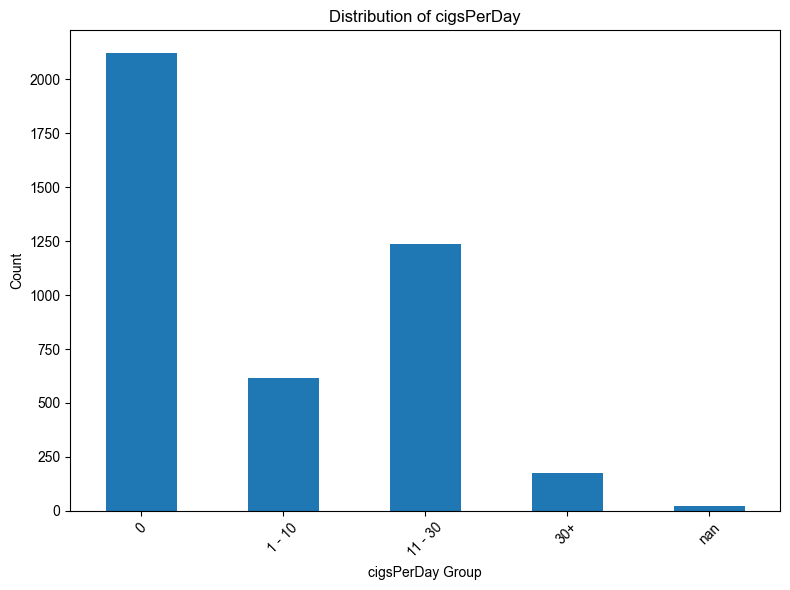

In [7]:
# Calculate the number of missing values in the cigsPerDay column
missing_cigs = df['cigsPerDay'].isnull().sum()
# Calculate the total number of data in the dataset
total_data = df.size
# Calculate the proportion of missing values in the cigsPerDay column to the total data
missing_percentage = (missing_cigs / total_data) * 100
print(f'Proportion of missing values in the cigsPerDay column to the total data: {missing_percentage:.2f}%')
# Group the cigsPerDay column
bins = [0, 1, 11, 31, float('inf')]
labels = ['0', '1 - 10', '11 - 30', '30+']
df['cigsPerDay_group'] = pd.cut(df['cigsPerDay'], bins=bins, labels=labels, right=False)
# Count the values after grouping
value_counts_cigs = df['cigsPerDay_group'].value_counts(dropna=False)
value_counts_cigs = value_counts_cigs.reindex(labels + [float('nan')])
plt.figure(figsize=(8, 6))
value_counts_cigs.plot(kind='bar')
plt.xlabel('cigsPerDay Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of cigsPerDay')
plt.tight_layout()
plt.show()

We noticed that the cigsPerDay column has a small number of missing values. First, we distinguish between smokers and non-smokers using the currentSmoker column to create masks. Next, we count the number of missing values for each group, calculate the median of cigsPerDay for smokers, and assume a smoking amount of 0 for non-smokers based on common sense. Finally, we fill the missing values with the median for smokers and 0 for non-smokers, ensuring the data is complete and reasonable.

Processing the 'cigsPerDay' column: a total of 29 missing values were filled in (29 among smokers, 0 among non-smokers)
Processed data saved successfully as 'framingham_filled.csv'


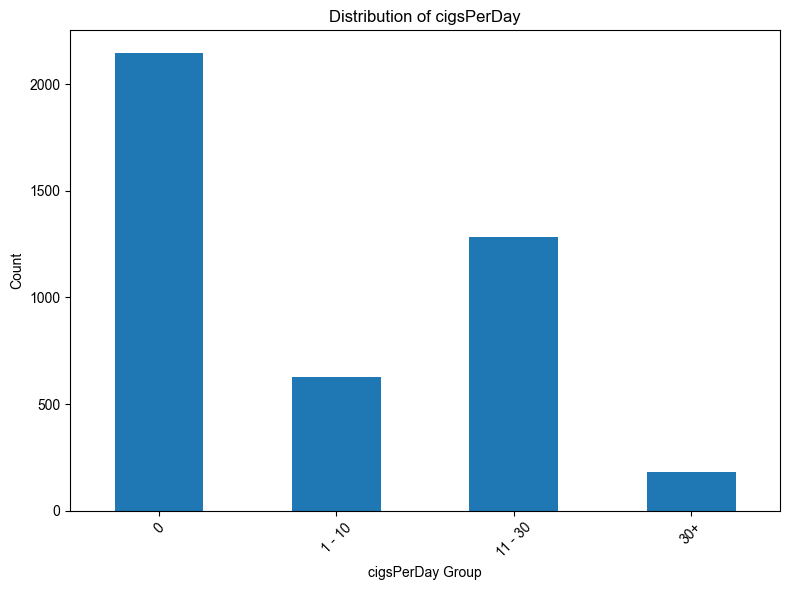

In [8]:
df = pd.read_csv('framingham.csv')
# Distinguish smokers and non-smokers
smoker_mask = df['currentSmoker'] == 1  # Smoker mask
non_smoker_mask = df['currentSmoker'] == 0  # Non-smoker mask

# Count the missing values separately for smokers and non-smokers
missing_cigs_smoker = df.loc[smoker_mask, 'cigsPerDay'].isnull().sum()
missing_cigs_non_smoker = df.loc[non_smoker_mask, 'cigsPerDay'].isnull().sum()
total_missing_cigs = missing_cigs_smoker + missing_cigs_non_smoker

# Calculate the median daily cigarette consumption for smokers (more resistant to outliers)
median_cigs = df.loc[smoker_mask, 'cigsPerDay'].median()

# Fill missing values with median for smokers, and 0 for non-smokers (reasonable assumption that non-smokers have 0 cigarette consumption)
df.loc[smoker_mask, 'cigsPerDay'] = df.loc[smoker_mask, 'cigsPerDay'].fillna(median_cigs)
df.loc[non_smoker_mask, 'cigsPerDay'] = df.loc[non_smoker_mask, 'cigsPerDay'].fillna(0)

print(f"Processing the 'cigsPerDay' column: a total of {total_missing_cigs} missing values were filled in ({missing_cigs_smoker} among smokers, {missing_cigs_non_smoker} among non-smokers)")


df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")
df1 = pd.read_csv('framingham_filled.csv')

# show the result after fill
bins = [0, 1, 11, 31, float('inf')]
labels = ['0', '1 - 10', '11 - 30', '30+']
df1['cigsPerDay_group'] = pd.cut(df1['cigsPerDay'], bins=bins, labels=labels, right=False)

# Count the values after grouping
value_counts_cigs = df1['cigsPerDay_group'].value_counts(dropna=False)
value_counts_cigs = value_counts_cigs.reindex(labels)

# Plot a bar chart
plt.figure(figsize=(8, 6))
value_counts_cigs.plot(kind='bar')
plt.xlabel('cigsPerDay Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of cigsPerDay')
plt.tight_layout()
plt.show()

## Education

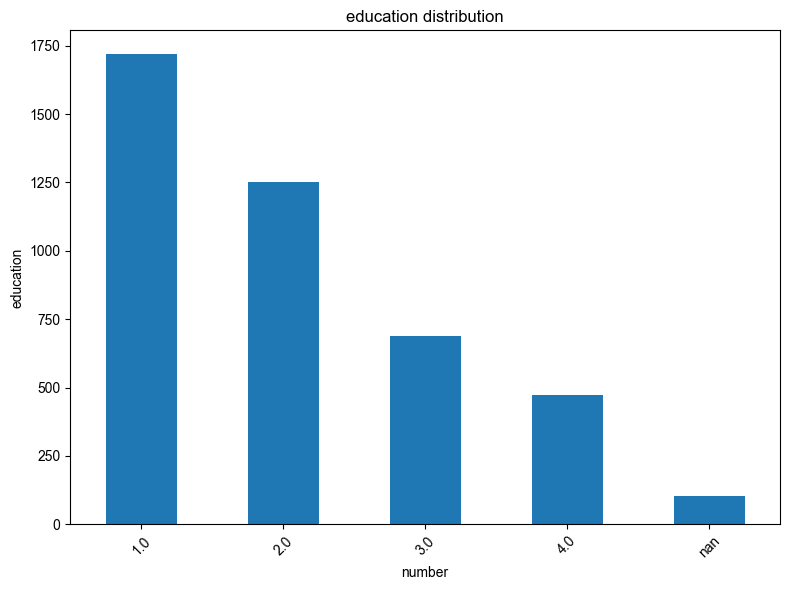

In [9]:
value_counts_education = df['education'].value_counts(dropna=False)
plt.figure(figsize=(8, 6))
value_counts_education.plot(kind='bar')
plt.ylabel('education')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('education distribution')
plt.tight_layout()
plt.show()

We handle missing values in the 'education' column by 'filling with the mode of each age group.'

 The main reasons are as follows:
 
  on one hand, directly deleting samples with missing values can lead to loss of valuable data, reduce the sample size, potentially change the distribution characteristics of the original data, and thus affect the accuracy of subsequent analyses. 
  
  Additionally, most statistical tools cannot directly process data with missing values, so filling in missing values is essential for ensuring data completeness and meeting analytical needs. On the other hand, missing values may contain latent information such as 'differences in response habits among different age groups.' Filling them with a global value would ignore the intrinsic association between age and educational level (for example, people from different generations have had different educational opportunities; the mainstream educational level of the 30–40 age group may differ significantly from that of the 60–70 age group). Processing by age group more closely aligns with the actual data patterns.

Processing 'education' column: 105 missing values in total
Missing value ratio: 2.48%

Education mode for each age group:
30-35: 2.0
35-40: 2.0
40-45: 2.0
45-50: 1.0
50-55: 1.0
55-60: 1.0
60-65: 1.0
65-70: 1.0

Processed data saved successfully as 'framingham_filled.csv'


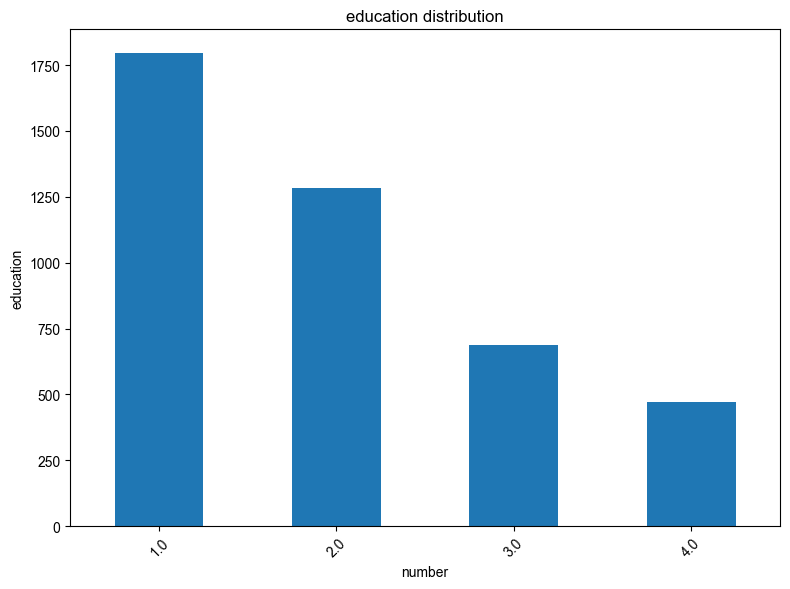

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. divide age into groups of 5 years
bins = range(30, 71, 5)  # 30-35,35-40,...,65-70
labels = [f'{i}-{i+5}' for i in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 2. count missing values in education column and print
missing_education = df['education'].isnull().sum()
total = len(df)
missing_ratio = (missing_education / total) * 100  # calculate percentage
print(f"Processing 'education' column: {missing_education} missing values in total")
print(f"Missing value ratio: {missing_ratio:.2f}%")  # print ratio with 2 decimal places

# 3. calculate education mode for each age group and print
group_mode_education = df.groupby('age_group')['education'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print("\nEducation mode for each age group:")
for age_group, mode in group_mode_education.items():
    print(f"{age_group}: {mode}")

# 4. fill missing values in education column by age group mode
def fill_by_group_mode(row):
    if pd.isnull(row['education']):
        # fill missing values with mode of the age group
        return group_mode_education.get(row['age_group'])
    return row['education']

# Apply the filling logic
df['education'] = df.apply(fill_by_group_mode, axis=1)
# Convert to category type
df['education'] = df['education'].astype('category')

# 5. save processed data
df.to_csv('framingham_filled.csv', index=False)
print("\nProcessed data saved successfully as 'framingham_filled.csv'")
df1 = pd.read_csv('framingham_filled.csv')

# 6. plot education distribution chart
value_counts_education = df1['education'].value_counts(dropna=False)
plt.figure(figsize=(8, 6))
value_counts_education.plot(kind='bar')
plt.ylabel('education')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('education distribution')
plt.tight_layout()
plt.show()

## Current smoker or not

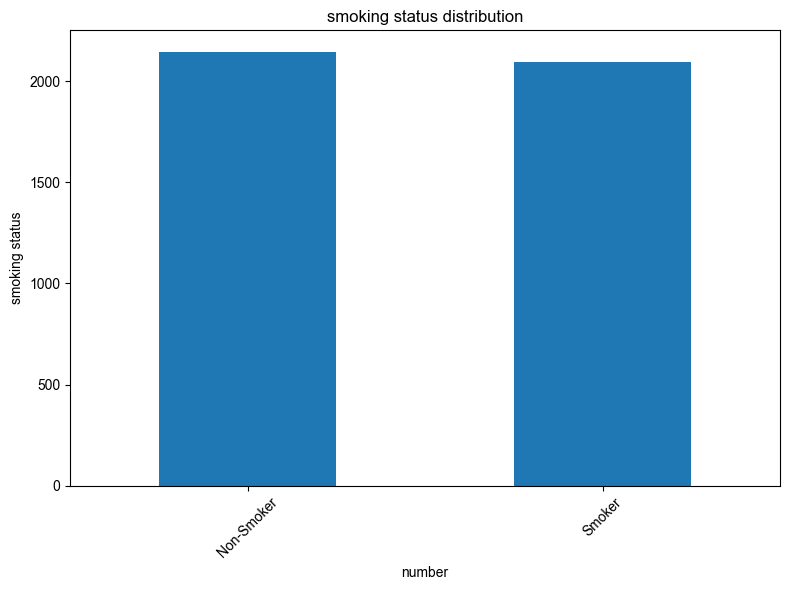

In [11]:
# Replace 0 in the male column with female, and 1 with male
df['currentSmoker'] = df['currentSmoker'].map({0: 'Non-Smoker', 1:'Smoker'})

# Plot the number distribution of the male column
value_counts_male = df['currentSmoker'].value_counts()
plt.figure(figsize=(8, 6))
value_counts_male.plot(kind='bar')
plt.ylabel('smoking status')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('smoking status distribution')
plt.tight_layout()
plt.show()

# The distribution corresponds to the expected.
# No anomalies detected

## BPMeds


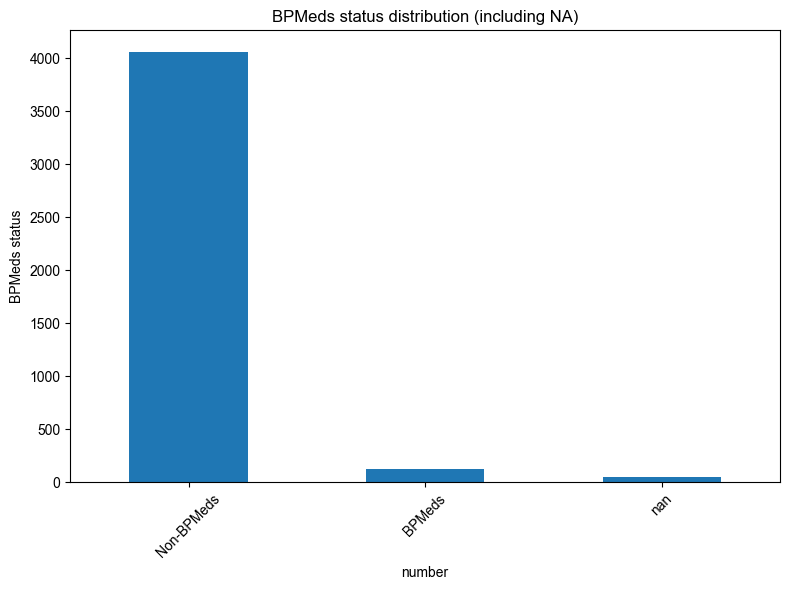

In [12]:
# Count the quantity of each value of BPMeds (including missing values)
value_counts_BPMeds = df['BPMeds'].value_counts(dropna=False)

# Replace 0 with Non-BPMeds and 1 with BPMeds
df['BPMeds'] = df['BPMeds'].map({0: 'Non-BPMeds', 1: 'BPMeds'})

# Plot the number distribution of the BPMeds column (including missing values)
value_counts_BPMeds_after = df['BPMeds'].value_counts(dropna=False)  
plt.figure(figsize=(8, 6))
value_counts_BPMeds_after.plot(kind='bar')  
plt.ylabel('BPMeds status')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('BPMeds status distribution (including NA)')
plt.tight_layout()
plt.show()

In [13]:
total = len(df)
missing_bpmeds = df['BPMeds'].isnull().sum()
missing_ratio = missing_bpmeds / total * 100  
print(f"The number of missing values in the BPMeds column: {missing_bpmeds}")
print(f"The proportion of missing values in the BPMeds column to the total: {missing_ratio:.2f}%")

The number of missing values in the BPMeds column: 53
The proportion of missing values in the BPMeds column to the total: 1.25%


In [14]:
df2 = pd.read_csv('framingham.csv')
total_origin = len(df2)
total_missing_data = (missing_bpmeds + deleted_rows) / total_origin * 100
print(f"Delete missing data after processing BPMeds column: {total_missing_data:.2f}%")

Delete missing data after processing BPMeds column: 2.69%


Overall, the deletion not exceed 5%.

For these missing values, we chose to delete the entire row of data because the number of missing values is relatively small, and therefore they are considered to have little impact on the results.

Processed data saved successfully as 'framingham_filled.csv'


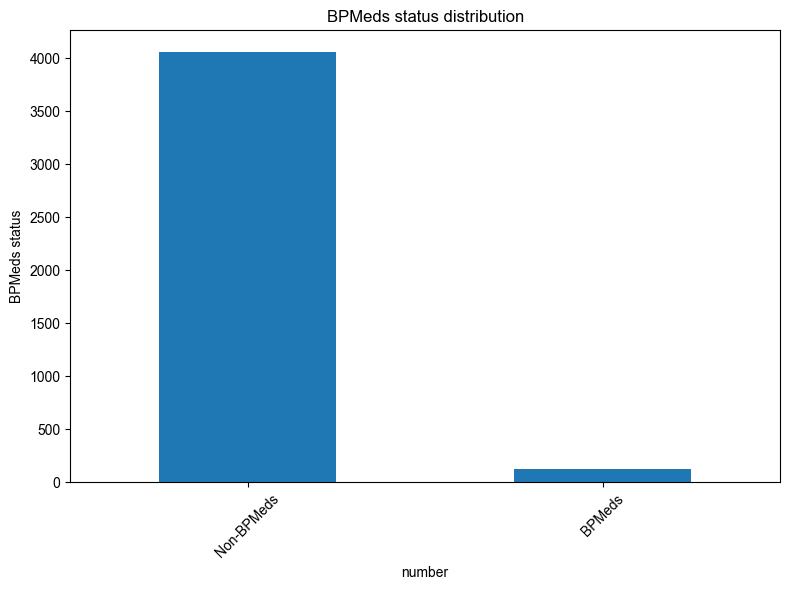

In [15]:
# Count the missing values in the 'BPMeds' column
missing_bpmeds = df['BPMeds'].isnull().sum()

# Drop rows where 'BPMeds' is NA
df = df.dropna(subset=['BPMeds'])

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")
df1 = pd.read_csv('framingham_filled.csv')

# show result after fill
value_counts_BPMeds = df1['BPMeds'].value_counts()
plt.figure(figsize=(8, 6))
value_counts_BPMeds.plot(kind='bar')
plt.ylabel('BPMeds status')
plt.xlabel('number')
plt.xticks(rotation=45)
plt.title('BPMeds status distribution')
plt.tight_layout()
plt.show()

## Prevalent Stroke, prevalentHyp, and diabetes

In [16]:
variables = ['prevalentStroke', 'prevalentHyp', 'diabetes']
result_list = []

for var in variables:
    # calculate counts
    count_df = df[var].value_counts().reset_index()
    count_df.columns = ['Category', 'Count']
    
    # calculate percentage
    total = count_df['Count'].sum()
    count_df['Percentage (%)'] = (count_df['Count'] / total * 100).round(1)
        
    count_df.insert(0, 'Variable', var)

    # map category values to 'No' and 'Yes'
    count_df['Category'] = count_df['Category'].map({0: 'No', 1: 'Yes'})
    result_list.append(count_df)

# concatenate all results into a single DataFrame
freq_table = pd.concat(result_list, ignore_index=True)

# show the frequency table
print(freq_table)

          Variable Category  Count  Percentage (%)
0  prevalentStroke       No   4161            99.4
1  prevalentStroke      Yes     24             0.6
2     prevalentHyp       No   2891            69.1
3     prevalentHyp      Yes   1294            30.9
4         diabetes       No   4078            97.4
5         diabetes      Yes    107             2.6


##  TotChol

We believe that there is a certain relationship between total cholesterol levels and age. Therefore, we grouped by age and filled in the missing values using the median cholesterol levels of each age group.

In [17]:
missing_totChol = df['totChol'].isnull().sum()
df['age_group'] = pd.cut(df['age'], bins=range(int(df['age'].min()), int(df['age'].max()) + 6, 5))
medians = df.groupby('age_group')['totChol'].transform('median')
df['totChol'] = df['totChol'].fillna(medians)
missing_ratio = (missing_totChol / len(df)) * 100

print(f"Processing the 'totChol' column: filled {missing_totChol} missing values")
print(f"The proportion of missing values in the totChol column to the total: {missing_ratio:.2f}%")

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")
df1 = pd.read_csv('framingham_filled.csv')

Processing the 'totChol' column: filled 49 missing values
The proportion of missing values in the totChol column to the total: 1.17%
Processed data saved successfully as 'framingham_filled.csv'


total outlier number：19
outlier ratio：0.45%


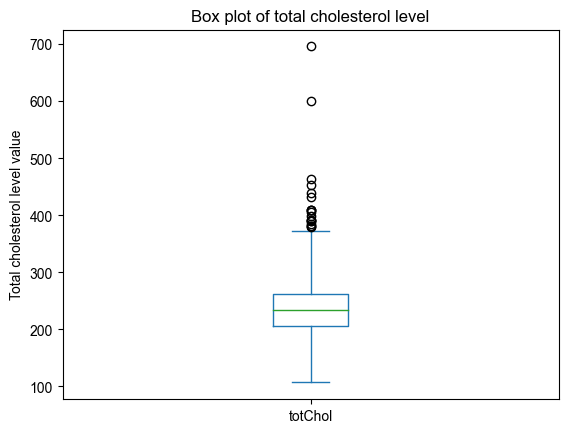

In [18]:
# calculate quartiles and IQR
q1 = df1['totChol'].quantile(0.25)
q3 = df1['totChol'].quantile(0.75)
iqr = q3 - q1

# define outlier boundaries
lower_bound = q1 - 2 * iqr
upper_bound = q3 + 2 * iqr

# filter outliers
outliers = df1[(df1['totChol'] < lower_bound) | (df1['totChol'] > upper_bound)]['totChol']

# calculate outlier count and ratio
outlier_count = len(outliers)
total_count = len(df1['totChol']) 
outlier_ratio = (outlier_count / total_count) * 100


print(f"total outlier number：{outlier_count}")
print(f"outlier ratio：{outlier_ratio:.2f}%")

df1['totChol'].plot.box(whis=2.0)
plt.title('Box plot of total cholesterol level')
plt.ylabel('Total cholesterol level value')
plt.show()

## sysBP and diaBP

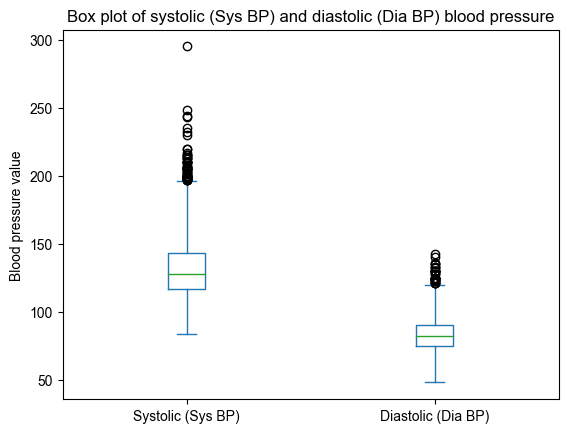

sysBP outlier statistics:
total outlier number：55
outlier ratio：1.31%
diaBP outlier statistics:
total outlier number：31
outlier ratio：0.74%


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# columns to plot
columns_to_plot = ['sysBP', 'diaBP']

# create box plots 
data_to_plot = df[columns_to_plot]
ax = data_to_plot.plot.box(whis=2.0)
plt.title('Box plot of systolic (Sys BP) and diastolic (Dia BP) blood pressure')
plt.ylabel('Blood pressure value')
ax.set_xticklabels(['Systolic (Sys BP)', 'Diastolic (Dia BP)'])
plt.show()

# calculate outlier statistics for each column
for col in columns_to_plot:
    # calculate quartiles and IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # define outlier bounds 
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    
    # filter outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # calculate outlier count and ratio
    outlier_count = len(outliers)
    total_count = len(df[col])  # total count (including missing values)
    outlier_ratio = (outlier_count / total_count) * 100
    
    # print results (distinguish between two columns)
    print(f"{col} outlier statistics:")
    print(f"total outlier number：{outlier_count}")
    print(f"outlier ratio：{outlier_ratio:.2f}%")



## BMI

In [20]:
# Count the missing values in the 'BMI' column
missing_BMI = df['BMI'].isnull().sum()

# Calculate the median of BMI
median_BMI = df['BMI'].median()
# Fill missing values with the median
df['BMI'] = df['BMI'].fillna(median_BMI)

print(f"Processing the 'BMI' column: filled {missing_BMI} missing values")
missing_ratio = (missing_BMI / len(df)) * 100
print(f"The proportion of missing values in the BMI column to the total: {missing_ratio:.2f}%") 

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

Processing the 'BMI' column: filled 19 missing values
The proportion of missing values in the BMI column to the total: 0.45%
Processed data saved successfully as 'framingham_filled.csv'


total outlier number：59
outlier ratio：1.41%


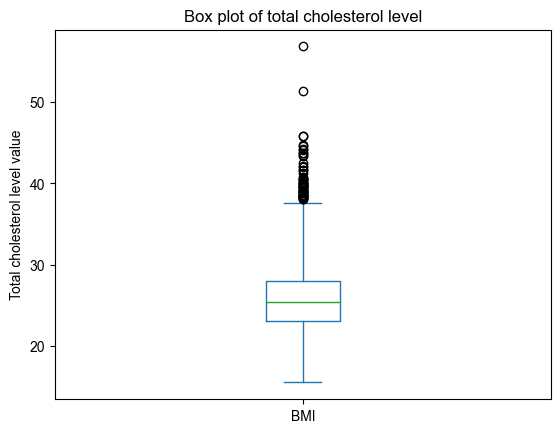

In [21]:
# calculate quartiles and IQR
q1 = df1['BMI'].quantile(0.25)
q3 = df1['BMI'].quantile(0.75)
iqr = q3 - q1

# define outlier boundaries
lower_bound = q1 - 2 * iqr
upper_bound = q3 + 2 * iqr

# filter outliers
outliers = df1[(df1['BMI'] < lower_bound) | (df1['BMI'] > upper_bound)]['BMI']

# calculate outlier count and ratio
outlier_count = len(outliers)
total_count = len(df1['BMI']) 
outlier_ratio = (outlier_count / total_count) * 100


print(f"total outlier number：{outlier_count}")
print(f"outlier ratio：{outlier_ratio:.2f}%")

df1['BMI'].plot.box(whis=2.0)
plt.title('Box plot of total cholesterol level')
plt.ylabel('Total cholesterol level value')
plt.show()

## HeartRate

In [22]:
# Count the missing values in the 'heartRate' column
missing_heartRate = df['heartRate'].isnull().sum()

# Calculate the median of heart rate
median_heartRate = df['heartRate'].median()
# Fill missing values with the median
df['heartRate'] = df['heartRate'].fillna(median_heartRate)

print(f"Processing the 'heartRate' column: filled {missing_heartRate} missing values")
missing_ratio = (missing_heartRate / len(df)) * 100
print(f"The proportion of missing values in the heartRate column to the total: {missing_ratio:.2f}%")

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

Processing the 'heartRate' column: filled 1 missing values
The proportion of missing values in the heartRate column to the total: 0.02%
Processed data saved successfully as 'framingham_filled.csv'


total outlier number：20
outlier ratio：0.48%


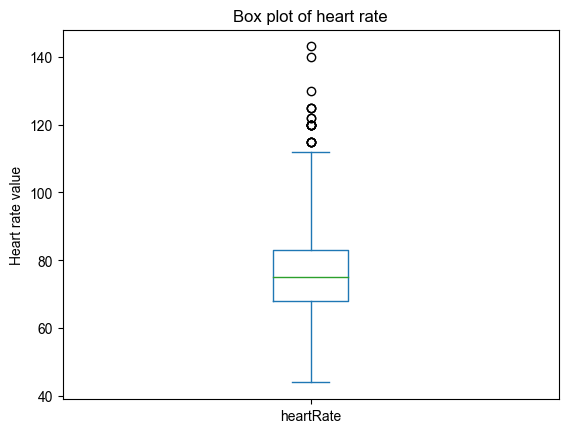

In [23]:
# calculate quartiles and IQR
q1 = df1['heartRate'].quantile(0.25)
q3 = df1['heartRate'].quantile(0.75)
iqr = q3 - q1

# define outlier boundaries
lower_bound = q1 - 2 * iqr
upper_bound = q3 + 2 * iqr

# filter outliers
outliers = df1[(df1['heartRate'] < lower_bound) | (df1['heartRate'] > upper_bound)]['heartRate']

# calculate outlier count and ratio
outlier_count = len(outliers)
total_count = len(df1['heartRate']) 
outlier_ratio = (outlier_count / total_count) * 100


print(f"total outlier number：{outlier_count}")
print(f"outlier ratio：{outlier_ratio:.2f}%")

df1['heartRate'].plot.box(whis=2.0)
plt.title('Box plot of heart rate')
plt.ylabel('Heart rate value')
plt.show()

## Glucose

In [24]:
# Count the missing values in the 'glucose' column
missing_glucose = df['glucose'].isnull().sum()

# Calculate the median of glucose
median_glucose = df['glucose'].median()
# Fill missing values with the median
df['glucose'] = df['glucose'].fillna(median_glucose)

print(f"Processing the 'glucose' column: filled {missing_glucose} missing values")

missing_ratio = (missing_glucose / len(df)) * 100
print(f"The proportion of missing values in the glucose column to the total: {missing_ratio:.2f}%")

df.to_csv('framingham_filled.csv', index=False)
print("Processed data saved successfully as 'framingham_filled.csv'")

Processing the 'glucose' column: filled 386 missing values
The proportion of missing values in the glucose column to the total: 9.22%
Processed data saved successfully as 'framingham_filled.csv'


total outlier number：106
outlier ratio：2.53%


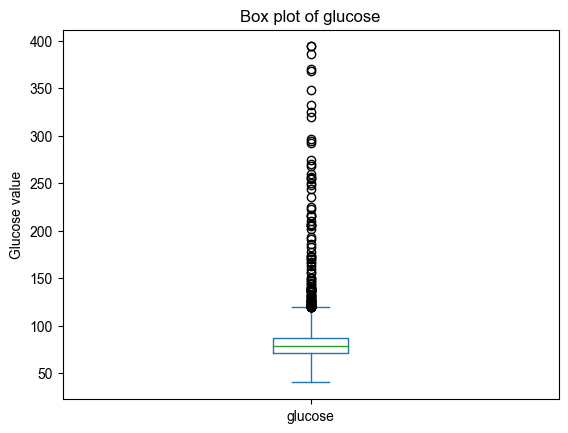

In [25]:
# calculate quartiles and IQR
q1 = df1['glucose'].quantile(0.25)
q3 = df1['glucose'].quantile(0.75)
iqr = q3 - q1

# define outlier boundaries
lower_bound = q1 - 2 * iqr
upper_bound = q3 + 2 * iqr

# filter outliers
outliers = df1[(df1['glucose'] < lower_bound) | (df1['glucose'] > upper_bound)]['glucose']

# calculate outlier count and ratio
outlier_count = len(outliers)
total_count = len(df1['glucose']) 
outlier_ratio = (outlier_count / total_count) * 100


print(f"total outlier number：{outlier_count}")
print(f"outlier ratio：{outlier_ratio:.2f}%")

df1['glucose'].plot.box(whis=2.0)
plt.title('Box plot of glucose')
plt.ylabel('Glucose value')
plt.show()

## TenYearCHD

TenYearCHD table：
   TenYearCHD  number
0           0    3552
1           1     633


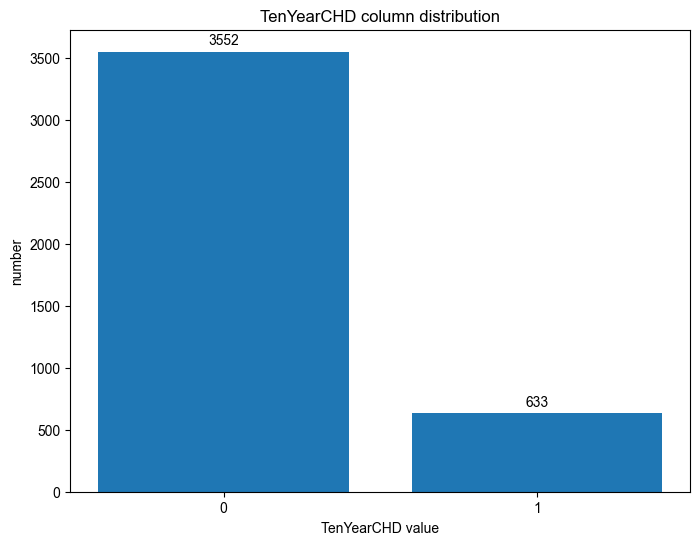

In [26]:
# Count the different values in the TenYearCHD column
value_counts = df['TenYearCHD'].value_counts().reset_index(name='number')

# output the statistics table
print('TenYearCHD table：')
print(value_counts)

# draw the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts['TenYearCHD'].astype(str), value_counts['number'])
plt.xlabel('TenYearCHD value')
plt.ylabel('number')
plt.title('TenYearCHD column distribution')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

## Check whether the missing values have been completely filled

In [27]:
# compare the missing values before and after fill
df_original = pd.read_csv('framingham.csv')  
df_filled = pd.read_csv('framingham_filled.csv')

# calculate the missing values before and after fill
original_columns = df_original.columns
missing_original = df_original[original_columns].isnull().sum()
missing_filled = df_filled[original_columns].isnull().sum()

# calculate the number of missing values handled (original missing - post-fill missing)
handled_missing = missing_original - missing_filled

# merge into a comparison table
missing_comparison = pd.DataFrame({
    'original_missing': missing_original,
    'post_fill_missing': missing_filled,
    'handled_missing': handled_missing
})

# calculate the total number of missing values handled
total_handled = handled_missing.sum()

# print the comparison table and total handled missing values
print("each column missing values handled:")
print(missing_comparison)
print(f"\nTotal missing values handled: {total_handled}")


each column missing values handled:
                 original_missing  post_fill_missing  handled_missing
male                            0                  0                0
age                             0                  0                0
education                     105                  0              105
currentSmoker                   0                  0                0
cigsPerDay                     29                  0               29
BPMeds                         53                  0               53
prevalentStroke                 0                  0                0
prevalentHyp                    0                  0                0
diabetes                        0                  0                0
totChol                        50                  0               50
sysBP                           0                  0                0
diaBP                           0                  0                0
BMI                            19                  0  

Summary: Based on the online search for the reasonable values of glucose and cholesterol in medicine, it was found that the data on the table was normal. Such values could exist. For instance, if the surveyed individuals had diabetes or other diseases, the data on the table would all be within the acceptable range.We have dealt with all the missing data in the data table.

# Exploratory analysis and visualization

## The relationship between the age and the total cholesterol level

The Pearson correlation coefficient (filtered): 0.265663878355973, p value: 1.6422553315130183e-68


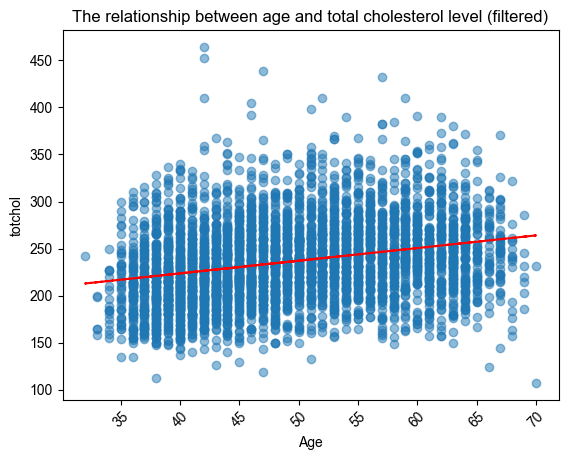

In [28]:
df_filtered = df[(df['totChol'] <= 500)]
corr, p_value = stats.pearsonr(df_filtered['age'], df_filtered['totChol'])
print(f'The Pearson correlation coefficient (filtered): {corr}, p value: {p_value}')

plt.scatter(df_filtered['age'], df_filtered['totChol'], alpha=0.5)
plt.title('The relationship between age and total cholesterol level (filtered)')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('totchol')

z = np.polyfit(df_filtered['age'], df_filtered['totChol'], 1)
p = np.poly1d(z)
plt.plot(df_filtered['age'], p(df_filtered['age']), "r--")
plt.show()

Conclusion: From the result of output we can know, there is a positive relationship between age and total cholesterol levels. That is, as age increases, the total cholesterol levels tend to rise.Besides,The p-value is much smaller than the commonly used significance level (such as 0.05), which indicates that we have strong evidence to reject the null hypothesis (the null hypothesis usually assumes no correlation between the two variables), and thus we can conclude that the correlation between age and total cholesterol level is significant.

## The relationship between smoke and TenYearCHD

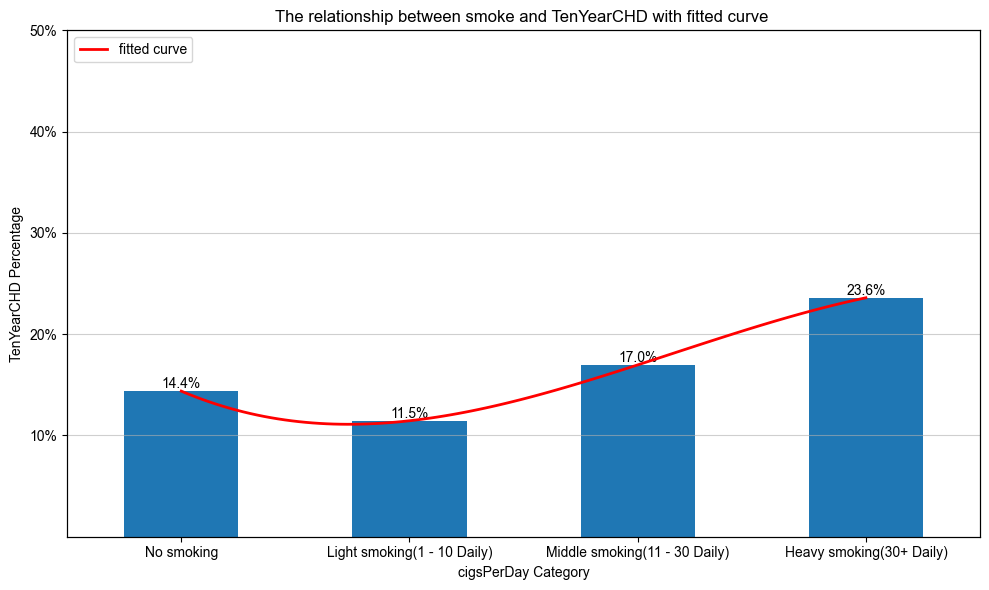

In [29]:
import matplotlib.ticker as mtick 
def categorize_smoking(cigs):
    if cigs == 0:
        return 'No smoking'
    elif 1 <= cigs <= 10:
        return 'Light smoking(1 - 10 Daily)'
    elif 11 <= cigs <= 30:
        return 'Middle smoking(11 - 30 Daily)'
    else:  
        return 'Heavy smoking(30+ Daily)'

df_filled['smoking_category'] = df_filled['cigsPerDay'].apply(categorize_smoking)

smoking_chd_rate = df_filled.groupby('smoking_category')['TenYearCHD'].mean().reindex([
    'No smoking', 
    'Light smoking(1 - 10 Daily)', 
    'Middle smoking(11 - 30 Daily)', 
    'Heavy smoking(30+ Daily)'
])

smoking_chd_percent = smoking_chd_rate * 100

plt.figure(figsize=(10, 6))

ax = smoking_chd_percent.plot(kind='bar')

x_anchors = range(len(smoking_chd_percent))
y_anchors = smoking_chd_percent.values

f = interp1d(x_anchors, y_anchors, kind='cubic')

x_new = np.linspace(min(x_anchors), max(x_anchors), 100)
y_new = f(x_new)

ax2 = ax.twinx()
ax2.plot(x_new, y_new, 'r-', linewidth=2, label='fitted curve')
ax2.legend(loc='upper left')

ax2.set_ylim(0, 50)

for i, (category, rate) in enumerate(smoking_chd_percent.items()):
    ax.annotate(f'{rate:.1f}%', 
                (i, rate), 
                ha='center', va='bottom', fontsize=10)

plt.title('The relationship between smoke and TenYearCHD with fitted curve ')
ax.set_xlabel('cigsPerDay Category')
ax.set_ylabel('TenYearCHD Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  
ax.grid(axis='y', alpha=0.6)
ax.set_ylim(0, 50)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))
ax.set_yticks([10, 20, 30, 40, 50])

ax2.set_yticks([])

plt.tight_layout()
plt.show()

Conclusion:Overall, except for a slight decrease during the mild smoking stage, as the amount of smoking increases, the incidence of coronary heart disease over a decade shows a significant upward trend. Especially from moderate smoking to heavy smoking, the increase is more pronounced, indicating that the greater the amount of smoking, the higher the risk of developing coronary heart disease.

## The relationship between BMI and underlying diseases/TenYearCHD

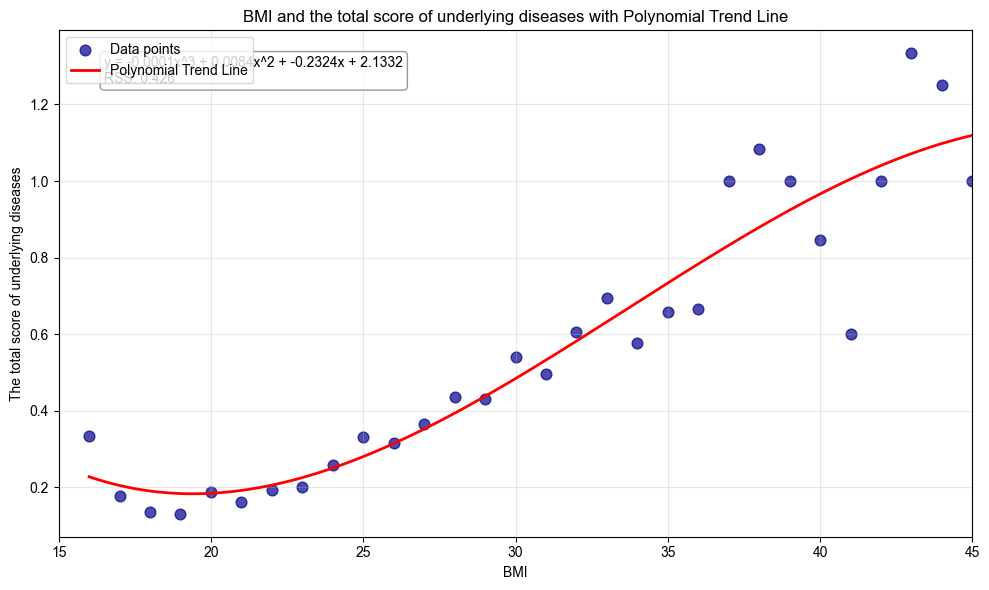

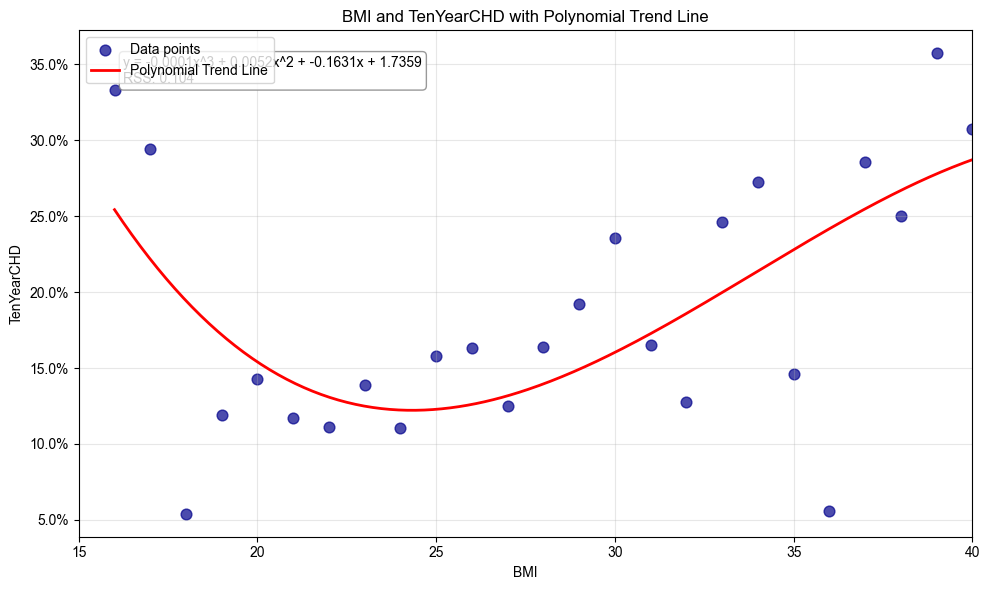

In [30]:
def create_polynomial_trend_plot(data, x_col, y_col, x_label, y_label, title, 
                                x_limit=None, degree=3, color='darkblue', Percentage = False):
    if x_limit:
        filtered_data = data[data[x_col] <= x_limit]
    else:
        filtered_data = data
    
    x_values = filtered_data[x_col].values
    y_values = filtered_data[y_col].values
    

    sorted_indices = np.argsort(x_values)
    x_sorted = x_values[sorted_indices]
    y_sorted = y_values[sorted_indices]
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(x_sorted, y_sorted, color=color, s=60, alpha=0.7, label='Data points')
    
    coefficients = np.polyfit(x_sorted, y_sorted, degree)
    poly_func = np.poly1d(coefficients)
    
    x_end = x_limit if x_limit else x_sorted.max()
    x_smooth = np.linspace(x_sorted.min(), x_end, 300)
    y_smooth = poly_func(x_smooth)
    
    y_pred = poly_func(x_sorted)
    residual = np.sum((y_sorted - y_pred) ** 2)
    
    plt.plot(x_smooth, y_smooth, 'red', linewidth=2, label='Polynomial Trend Line')
    
    terms = []
    for i, coef in enumerate(coefficients):
        power = degree - i
        if power == 0:
            terms.append(f"{coef:.4f}")
        elif power == 1:
            terms.append(f"{coef:.4f}x")
        else:
            terms.append(f"{coef:.4f}x^{power}")
    
    equation = "y = " + " + ".join(terms)
    equation += f"\nRSS: {residual:.3f}"

    plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                fontsize=10, verticalalignment='top')
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if (Percentage):{
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # 1.0对应100%
    }
    plt.grid(alpha=0.3)
    plt.legend()
    plt.xlim(x_sorted.min() - 1, x_end)
    plt.tight_layout()
    plt.show()

df_filled['comorbidities'] = (df_filled['prevalentStroke'] + 
                             df_filled['prevalentHyp'] + 
                             df_filled['diabetes'])

bmi_comorbid = df_filled.groupby(df_filled['BMI'].round().astype(int))['comorbidities'].mean().reset_index()
create_polynomial_trend_plot(
    data=bmi_comorbid,
    x_col='BMI',
    y_col='comorbidities',
    x_label='BMI',
    y_label='The total score of underlying diseases',
    title='BMI and the total score of underlying diseases with Polynomial Trend Line',
    x_limit=45,
    Percentage=False
)

bmi_chd = df_filled.groupby(df_filled['BMI'].round().astype(int))['TenYearCHD'].mean().reset_index()
create_polynomial_trend_plot(
    data=bmi_chd,
    x_col='BMI',
    y_col='TenYearCHD',
    x_label='BMI',
    y_label='TenYearCHD',
    title='BMI and TenYearCHD with Polynomial Trend Line',
    x_limit=40,
    Percentage=True
)

Conclusion:As BMI increases, the total disease score first decreases and reaches its minimum around 20, that is, when BMI is around 20, there is the least likelihood of prevalent Stroke, prevalent Hypertension, and diabetes. After that, as BMI rises, the likelihood of having these diseases increases. TenYearCHD also initially decreased, reaching its lowest point around 23, which is when BMI is approximately 23 and one is least likely to suffer from coronary heart disease. Then, as BMI increases, TenYearCHD also rises.

## The relationship between glucose and CHD rate

Normal glucose range: 52.50 - 104.50
Original data count: 4185
Data count after removing outliers: 3926
Outlier percentage: 6.19%


C:\Users\HP\AppData\Local\Temp\ipykernel_54940\2931467040.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['glucose_bin_normal'] = pd.cut(df_normal['glucose'], bins=10)


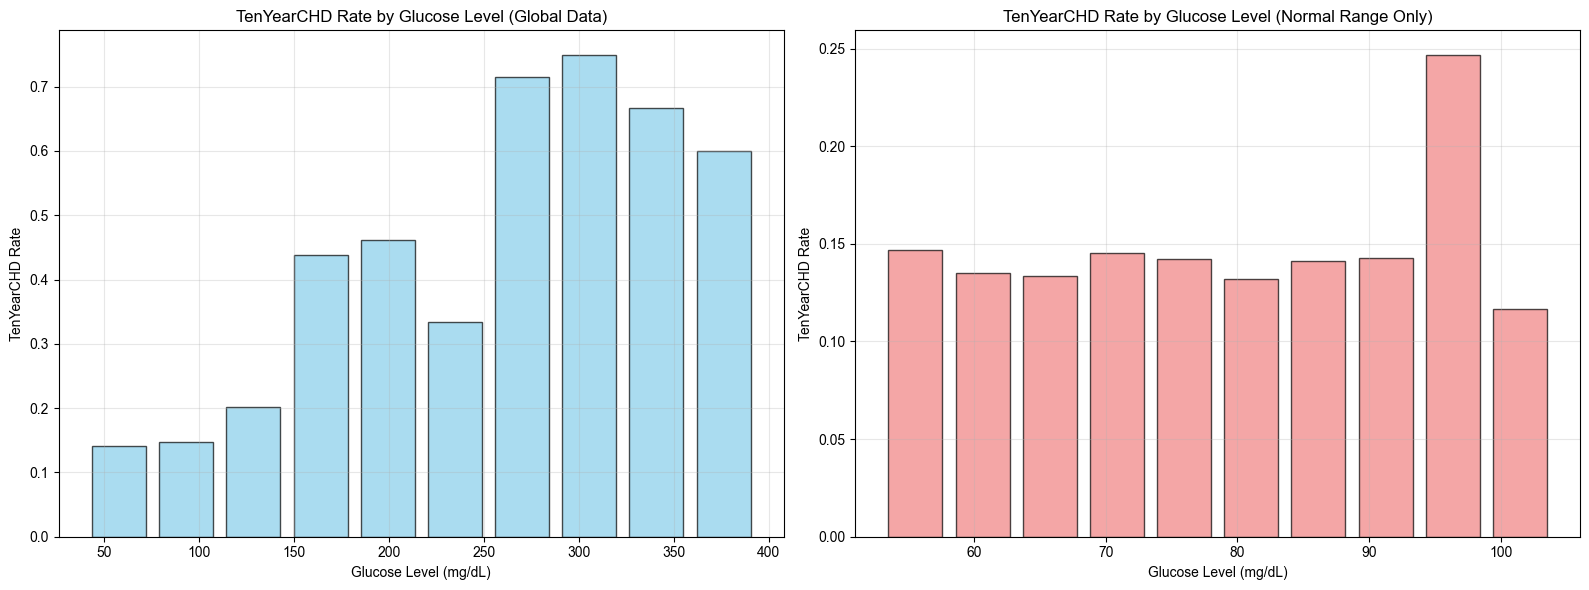

Overall CHD rate - Global data: 0.151
Overall CHD rate - Normal range: 0.144
Glucose mean - Global data: 81.60 mg/dL
Glucose mean - Normal range: 78.02 mg/dL


In [33]:
# Calculate the upper and lower bounds for glucose values 
Q1 = df_filled['glucose'].quantile(0.25)
Q3 = df_filled['glucose'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Normal glucose range: {lower_bound:.2f} - {upper_bound:.2f}")

df_normal = df_filled[(df_filled['glucose'] >= lower_bound) & (df_filled['glucose'] <= upper_bound)]

print(f"Original data count: {len(df_filled)}")
print(f"Data count after removing outliers: {len(df_normal)}")
print(f"Outlier percentage: {(len(df_filled) - len(df_normal)) / len(df_filled) * 100:.2f}%")

# Create subplots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Global data 
df_filled['glucose_bin_global'] = pd.cut(df_filled['glucose'], bins=10)
chd_rate_global = df_filled.groupby('glucose_bin_global')['TenYearCHD'].mean()
bin_centers_global = [interval.mid for interval in chd_rate_global.index]
bin_width_global = (bin_centers_global[1] - bin_centers_global[0]) * 0.8

ax1.bar(bin_centers_global, chd_rate_global.values, width=bin_width_global, 
        color='skyblue', alpha=0.7, edgecolor='black')
ax1.set_title('TenYearCHD Rate by Glucose Level (Global Data)')
ax1.set_xlabel('Glucose Level (mg/dL)')
ax1.set_ylabel('TenYearCHD Rate')
ax1.grid(True, alpha=0.3)

# Normal range data 
df_normal['glucose_bin_normal'] = pd.cut(df_normal['glucose'], bins=10)
chd_rate_normal = df_normal.groupby('glucose_bin_normal')['TenYearCHD'].mean()
bin_centers_normal = [interval.mid for interval in chd_rate_normal.index]
bin_width_normal = (bin_centers_normal[1] - bin_centers_normal[0]) * 0.8

ax2.bar(bin_centers_normal, chd_rate_normal.values, width=bin_width_normal, 
        color='lightcoral', alpha=0.7, edgecolor='black')
ax2.set_title('TenYearCHD Rate by Glucose Level (Normal Range Only)')
ax2.set_xlabel('Glucose Level (mg/dL)')
ax2.set_ylabel('TenYearCHD Rate')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




print(f"Overall CHD rate - Global data: {df_filled['TenYearCHD'].mean():.3f}")
print(f"Overall CHD rate - Normal range: {df_normal['TenYearCHD'].mean():.3f}")
print(f"Glucose mean - Global data: {df_filled['glucose'].mean():.2f} mg/dL")
print(f"Glucose mean - Normal range: {df_normal['glucose'].mean():.2f} mg/dL")

Conclusion: Since the range after removing the outliers falls within the normal range of human blood sugar, the basic probability of developing coronary heart disease has not changed significantly. The significant improvement in the second-to-last column might just be a coincidence. Overall, the majority of the sample data fall within the normal range of blood sugar levels. However, the data outside this range show an upward trend, reaching its peak at 300mg/dl. This indicates that the higher the blood sugar level, the higher the probability of developing coronary heart disease. But after reaching 300mg/dl, the risk slightly decreases.

## The relationship between BP and CHD rate

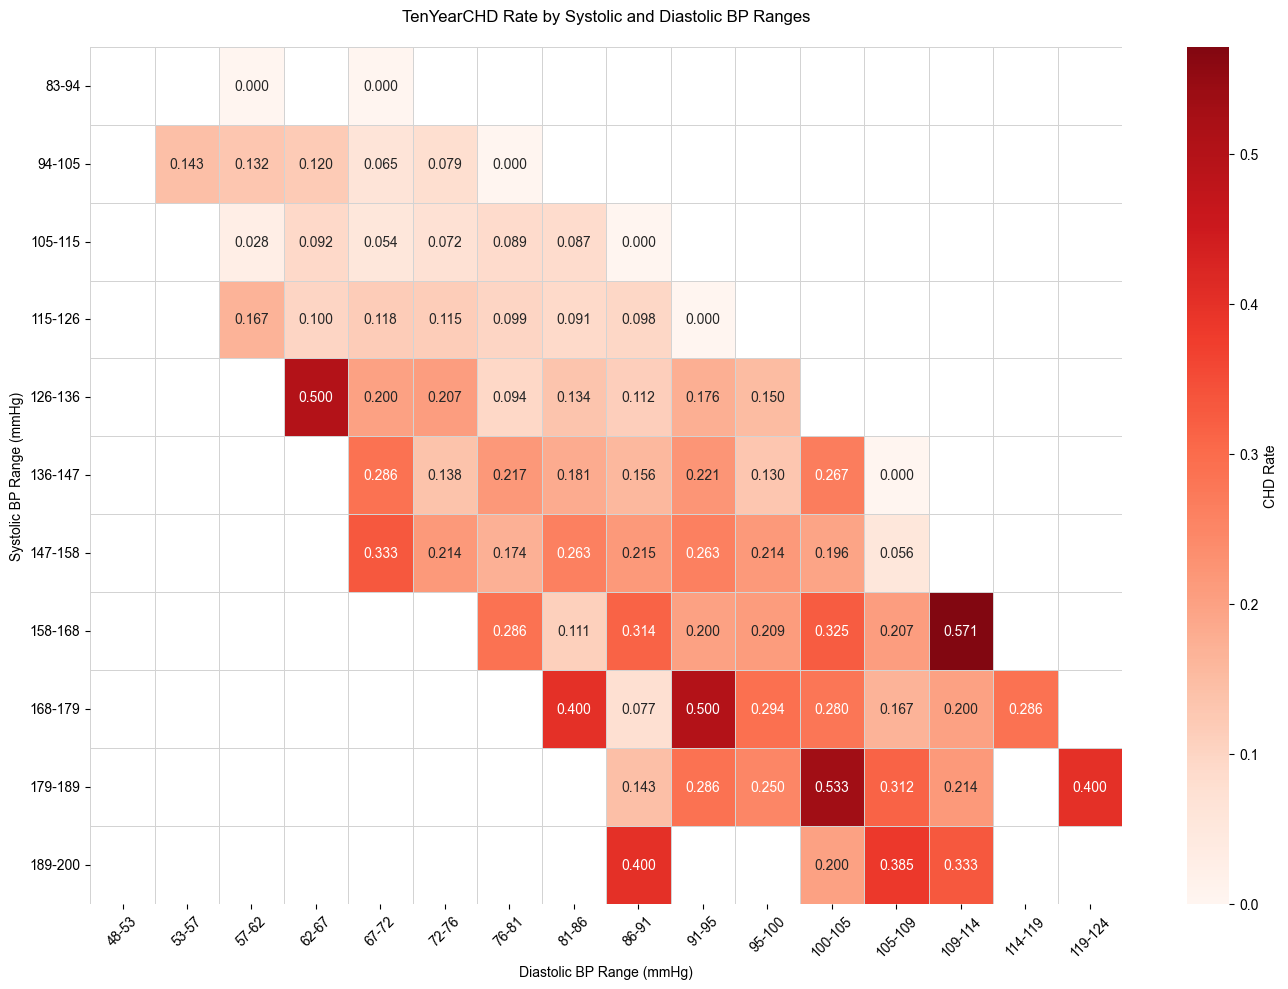

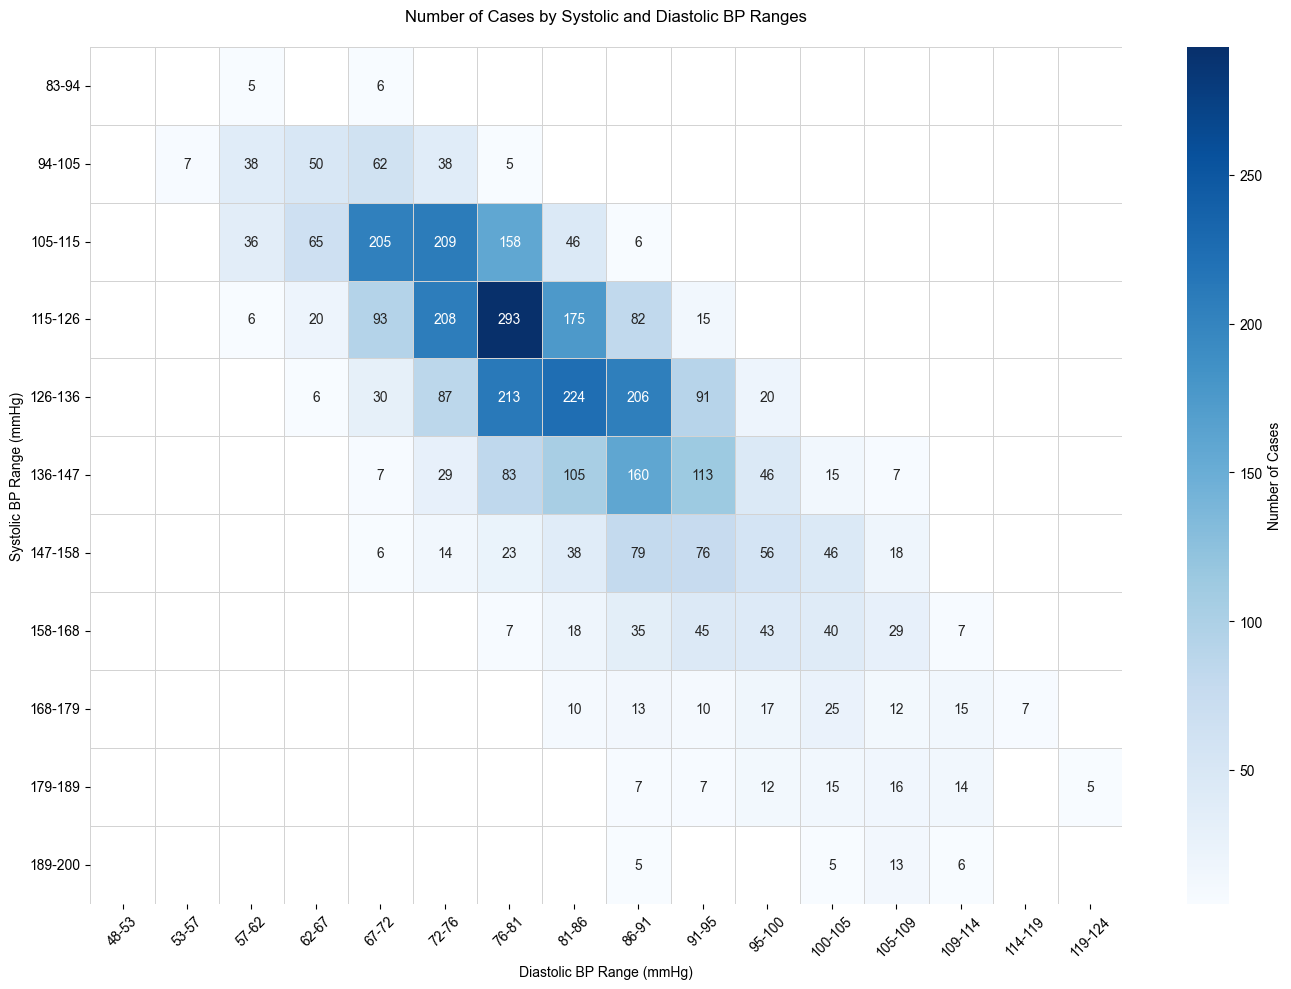

In [32]:
sysBP_bins = pd.cut(df_filled['sysBP'], bins=20)
diaBP_bins = pd.cut(df_filled['diaBP'], bins=20)

sysBP_categories = sysBP_bins.cat.categories
diaBP_categories = diaBP_bins.cat.categories

def format_bin_labels(categories):
    labels = []
    for bin_range in categories:
        left = int(round(bin_range.left))
        right = int(round(bin_range.right))
        labels.append(f"{left}-{right}")
    return labels

sysBP_labels = format_bin_labels(sysBP_categories)
diaBP_labels = format_bin_labels(diaBP_categories)


df_filled['sysBP_bin'] = pd.cut(df_filled['sysBP'], bins=20, labels=sysBP_labels)
df_filled['diaBP_bin'] = pd.cut(df_filled['diaBP'], bins=20, labels=diaBP_labels)

# CHD rate
chd_count_heatmap = df_filled.groupby(['sysBP_bin', 'diaBP_bin']).size().unstack()
chd_rate_heatmap = df_filled.groupby(['sysBP_bin', 'diaBP_bin'])['TenYearCHD'].mean().unstack()

# mask(n<5)
mask = chd_count_heatmap < 5


def get_bin_max_value(bin_label):
    """maxbox"""
    try:
        return int(bin_label.split('-')[1])
    except:
        return 0

sysBP_max_values = chd_rate_heatmap.index.map(get_bin_max_value)
rows_to_keep = sysBP_max_values <= 200

diaBP_max_values = chd_rate_heatmap.columns.map(get_bin_max_value)
cols_to_keep = diaBP_max_values <= 124

filtered_chd_rate = chd_rate_heatmap.loc[rows_to_keep, cols_to_keep]
filtered_mask = mask.loc[rows_to_keep, cols_to_keep]

plt.figure(figsize=(14, 10))
sns.heatmap(filtered_chd_rate, 
            annot=True, 
            fmt='.3f', 
            cmap='Reds', 
            cbar_kws={'label': 'CHD Rate'}, 
            center=filtered_chd_rate.mean().mean(),
            mask=filtered_mask,
            linewidths=0.5,
            linecolor='lightgray')
plt.title('TenYearCHD Rate by Systolic and Diastolic BP Ranges\n')
plt.xlabel('Diastolic BP Range (mmHg)')
plt.ylabel('Systolic BP Range (mmHg)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


filtered_chd_count = chd_count_heatmap.loc[rows_to_keep, cols_to_keep]

plt.figure(figsize=(14, 10))
sns.heatmap(filtered_chd_count, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            cbar_kws={'label': 'Number of Cases'},
            mask=filtered_mask,
            linewidths=0.5,
            linecolor='lightgray')
plt.title('Number of Cases by Systolic and Diastolic BP Ranges\n')
plt.xlabel('Diastolic BP Range (mmHg)')
plt.ylabel('Systolic BP Range (mmHg)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Conclusion: At the same diastolic pressure level, the increase in systolic pressure brings a more significant risk. When both systolic and diastolic pressures rise simultaneously, the risk increase has a synergistic effect.

# General conclusion and recommendations

As part of this study, a dataset from the Framingham Heart Study was analyzed to assess the impact of demographic, behavioral, and physiological factors on an individual’s likelihood of developing coronary heart disease (CHD) within the next ten years.

The main stages of the work included:

Importing data from a CSV file into a DataFrame.
Preliminary review and data cleaning: Standardizing variable formats and correcting inconsistent entries.Removing duplicate or invalid records.Handling missing values through imputation using median values or other suitable statistical methods.Verifying data consistency and plausibility based on medical knowledge and related variables.
Conducting analytical research: Assessing the relationship between age and CHD risk.Exploring gender differences in CHD incidence.Investigating the influence of smoking status on CHD risk.Evaluating the relationship between blood pressure, cholesterol levels, and CHD probability.Examining how BMI and glucose levels contribute to CHD development.Identifying the combined effect of comorbidities such as diabetes, hypertension, and stroke history on CHD likelihood.

Overall conclusion:

* The development of Coronary Heart Disease (CHD) is influenced by a combination of demographic, behavioral, and metabolic factors.
* Among these, age, smoking, hypertension, hypercholesterolemia, and hyperglycemia emerge as the most significant and consistent predictors of 10-year CHD risk.

The main conclusion:

1. Age
    * Age shows a strong positive correlation with CHD risk, particularly after 50 years of age.
    * The effect is more pronounced among men, indicating faster risk progression with age.

2. Gender Differences
    * Males exhibit a substantially higher incidence of CHD than females, underscoring the need for earlier screening and intervention in men.

3. Smoking
    * Smokers have nearly twice the 10-year CHD incidence compared to non-smokers, confirming smoking as one of the most critical modifiable risk factors.

4. Blood Pressure
    * Both systolic and diastolic pressures are significantly associated with CHD occurrence.
    * Individuals with CHD show notably higher mean systolic blood pressure (≈143.6 mmHg vs. 130.3 mmHg in non-CHD).
    * Effective blood pressure control can markedly reduce CHD risk.

5. Cholesterol
    * Total cholesterol demonstrates a clear positive relationship with CHD probability.
    * Elevated cholesterol is a reliable independent predictor of future CHD.

6. Blood Glucose
    * CHD risk rises continuously with increasing blood glucose levels, even within the “high-normal” or prediabetic range.
    * When glucose exceeds 180 mg/dL, CHD probability surpasses 40%.

7. Body Mass Index (BMI) and Comorbidities
    * Higher BMI correlates with the coexistence of chronic conditions such as diabetes, hypertension, and stroke.
    * Obesity acts as a key risk amplifier.
    * The presence of comorbidities (diabetes, hypertension, prior stroke) further increases CHD risk in a cumulative manner.

Recommendations:

1. Early Prevention and Lifestyle Interventions
    * Encourage early action for individuals with high-normal blood pressure, cholesterol, or glucose levels.
    * Promote smoking cessation, healthy diets, and regular exercise to reduce modifiable risk factors.

2. Regular Health Monitoring and Risk Assessment
    * Implement annual cardiovascular screenings (blood pressure, glucose, cholesterol) for middle-aged and older adults.
    * Use predictive risk models to identify high-risk individuals for targeted prevention and monitoring.

3. Healthcare System and Policy Support
    * Integrate CHD risk prediction tools into clinical systems to support personalized care and efficient resource allocation.
    * Strengthen public health campaigns focused on smoking reduction, weight management, and cardiovascular health awareness.